In [246]:
import pandas as pd
import numpy as np
#import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from pca import pca

#archivo = "./Crimes_-_2001_to_Present.csv"
archivo = "C:/Users/DELLPHOTO/Downloads/archive (1)/Crimes_-_2001_to_Present.csv"

In [188]:
df = pd.read_csv(archivo)

In [189]:
df.shape

(7846809, 22)

In [190]:
df = df.sample(frac=0.20)

In [191]:
df.shape

(1569362, 22)

In [192]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [193]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1569362,1569362,1569357,1446205,1446488,1551729,1551729,1569362,1551729,1551729
mean,7072591,1187,11,23,37,1164589,1885818,2010,42,-88
std,3531266,703,7,14,22,16807,32214,6,0,0
min,636,111,1,1,0,0,0,2001,37,-92
25%,3810789,621,6,10,23,1152965,1859071,2005,42,-88
50%,7073572,1034,10,23,32,1166102,1890782,2009,42,-88
75%,10211560,1731,17,34,57,1176365,1909321,2015,42,-88
max,13148021,2535,31,50,77,1205119,1951535,2023,42,-88


In [194]:
df.describe()#describe 2

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1569362,1569362,1569357,1446205,1446488,1551729,1551729,1569362,1551729,1551729
mean,7072591,1187,11,23,37,1164589,1885818,2010,42,-88
std,3531266,703,7,14,22,16807,32214,6,0,0
min,636,111,1,1,0,0,0,2001,37,-92
25%,3810789,621,6,10,23,1152965,1859071,2005,42,-88
50%,7073572,1034,10,23,32,1166102,1890782,2009,42,-88
75%,10211560,1731,17,34,57,1176365,1909321,2015,42,-88
max,13148021,2535,31,50,77,1205119,1951535,2023,42,-88


In [195]:
pd.options.display.float_format = '{:.0f}'.format

# display the dataframe without scientific notation
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1569362,1569362,1569357,1446205,1446488,1551729,1551729,1569362,1551729,1551729
mean,7072591,1187,11,23,37,1164589,1885818,2010,42,-88
std,3531266,703,7,14,22,16807,32214,6,0,0
min,636,111,1,1,0,0,0,2001,37,-92
25%,3810789,621,6,10,23,1152965,1859071,2005,42,-88
50%,7073572,1034,10,23,32,1166102,1890782,2009,42,-88
75%,10211560,1731,17,34,57,1176365,1909321,2015,42,-88
max,13148021,2535,31,50,77,1205119,1951535,2023,42,-88


In [196]:
df.dtypes
#Proyección esférica, latitud, longitud, donde podamos tener en un scatter plot distancia euclidiana
#

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [197]:
df.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
6424271,7680358,HS485464,08/27/2010 08:46:00 PM,062XX S VERNON AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),ALLEY,True,False,...,20,42,18,1180322,1863762,2010,02/10/2018 03:50:01 PM,42,-88,"(41.781426277, -87.614440844)"
4202290,3966599,HL330396,05/02/2005 07:45:00 AM,047XX S STATE ST,0460,BATTERY,SIMPLE,CTA BUS,True,False,...,3,38,08B,1177068,1873704,2005,02/28/2018 03:56:25 PM,42,-88,"(41.808782124, -87.626070778)"
2744439,2023295,HH233360,03/10/2002 11:15:00 AM,065XX S HAMILTON AV,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,...,NaN,NaN,26,1163152,1861344,2002,02/28/2018 03:56:25 PM,42,-88,"(41.775167627, -87.677457613)"
5806691,6696450,HR110110,01/07/2009 12:40:00 PM,017XX N CAMPBELL AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,1,24,14,1159431,1911414,2009,02/28/2018 03:56:25 PM,42,-88,"(41.912642281, -87.68972287)"
418576,10188850,HY376472,08/08/2015 11:00:00 AM,068XX S JUSTINE ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,17,67,14,1167183,1859393,2015,08/17/2015 03:03:40 PM,42,-88,"(41.769728518, -87.662736227)"


In [198]:
df["Primary Type"].unique()
#35 categorías 

array(['NARCOTICS', 'BATTERY', 'OTHER OFFENSE', 'CRIMINAL DAMAGE',
       'THEFT', 'MOTOR VEHICLE THEFT', 'BURGLARY', 'ASSAULT', 'ROBBERY',
       'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'INTIMIDATION',
       'PROSTITUTION', 'DECEPTIVE PRACTICE', 'GAMBLING',
       'PUBLIC PEACE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'SEX OFFENSE',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'KIDNAPPING', 'HOMICIDE', 'ARSON', 'CRIMINAL SEXUAL ASSAULT',
       'STALKING', 'CONCEALED CARRY LICENSE VIOLATION', 'OBSCENITY',
       'PUBLIC INDECENCY', 'NON - CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION'], dtype=object)

In [199]:
#drop Location, Updated On, Community Area, FBI Code, X Coordinate, Y Coordinate
df = df.drop(columns=["Location", "Updated On", "Community Area", "FBI Code", "X Coordinate", "Y Coordinate", "ID", "Case Number", "Latitude","Longitude","Ward","Beat"])

In [200]:
df.describe(include='object')

,Date,Block,IUCR,Primary Type,Description,Location Description
count,1569362,1569362,1569362,1569362,1569362,1567204
unique,1029887,51728,391,35,511,190
top,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET
freq,62,3382,126708,330860,184104,409526


In [201]:
df.describe(include="all")

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year
count,1569362,1569362,1569362,1569362,1569362,1567204,1569362,1569362,1569357,1569362
unique,1029887,51728,391,35,511,190,2,2,NaN,NaN
top,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,False,False,NaN,NaN
freq,62,3382,126708,330860,184104,409526,1160908,1352261,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2010
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,6
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2001
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2005
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2009
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,2015


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569362 entries, 6424271 to 4501422
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Date                  1569362 non-null  object 
 1   Block                 1569362 non-null  object 
 2   IUCR                  1569362 non-null  object 
 3   Primary Type          1569362 non-null  object 
 4   Description           1569362 non-null  object 
 5   Location Description  1567204 non-null  object 
 6   Arrest                1569362 non-null  bool   
 7   Domestic              1569362 non-null  bool   
 8   District              1569357 non-null  float64
 9   Year                  1569362 non-null  int64  
dtypes: bool(2), float64(1), int64(1), object(6)
memory usage: 110.8+ MB


<AxesSubplot:xlabel='IUCR', ylabel='Primary Type'>

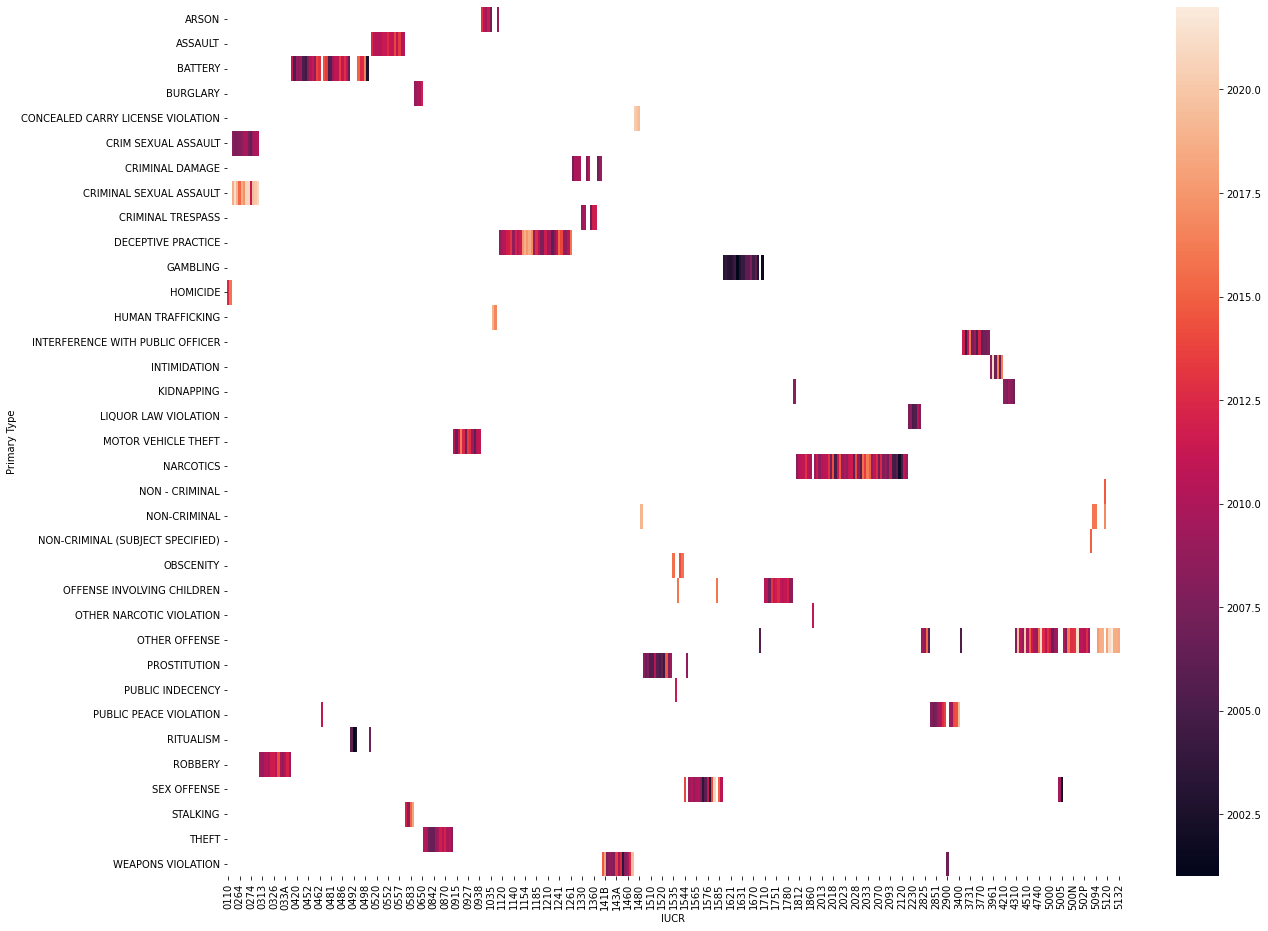

In [203]:
df_test= df.reset_index().pivot_table(index="Primary Type", columns="IUCR", values="Year")
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(df_test)
#Diagrama correlación entre 
#scatterplot por frecuencia

<AxesSubplot:xlabel='IUCR', ylabel='Primary Type'>

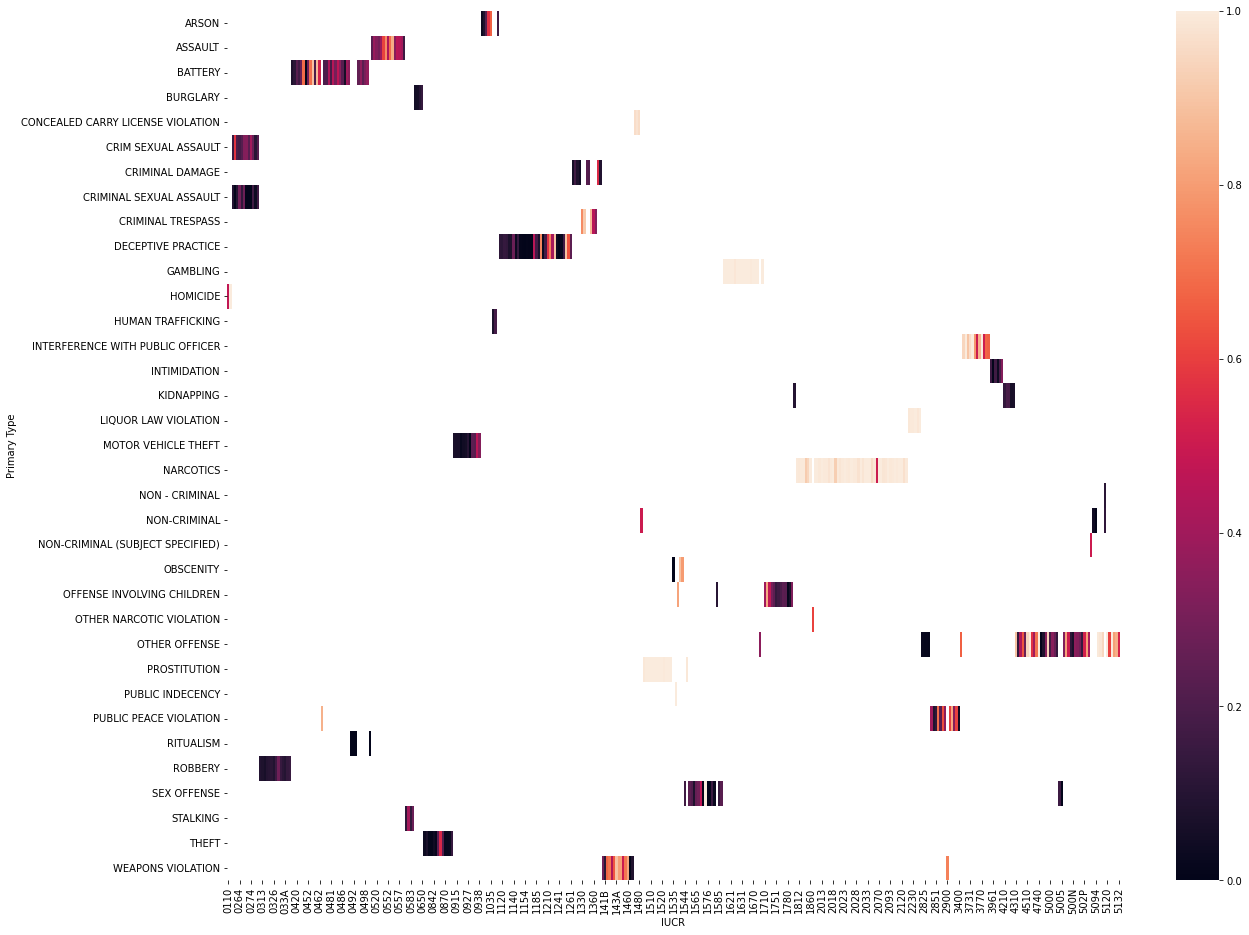

In [204]:
df_test2= df.reset_index().pivot_table(index="Primary Type", columns="IUCR", values="Arrest")
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(df_test2)
#Diagrama correlación entre 

<AxesSubplot:xlabel='Primary Type', ylabel='Count'>

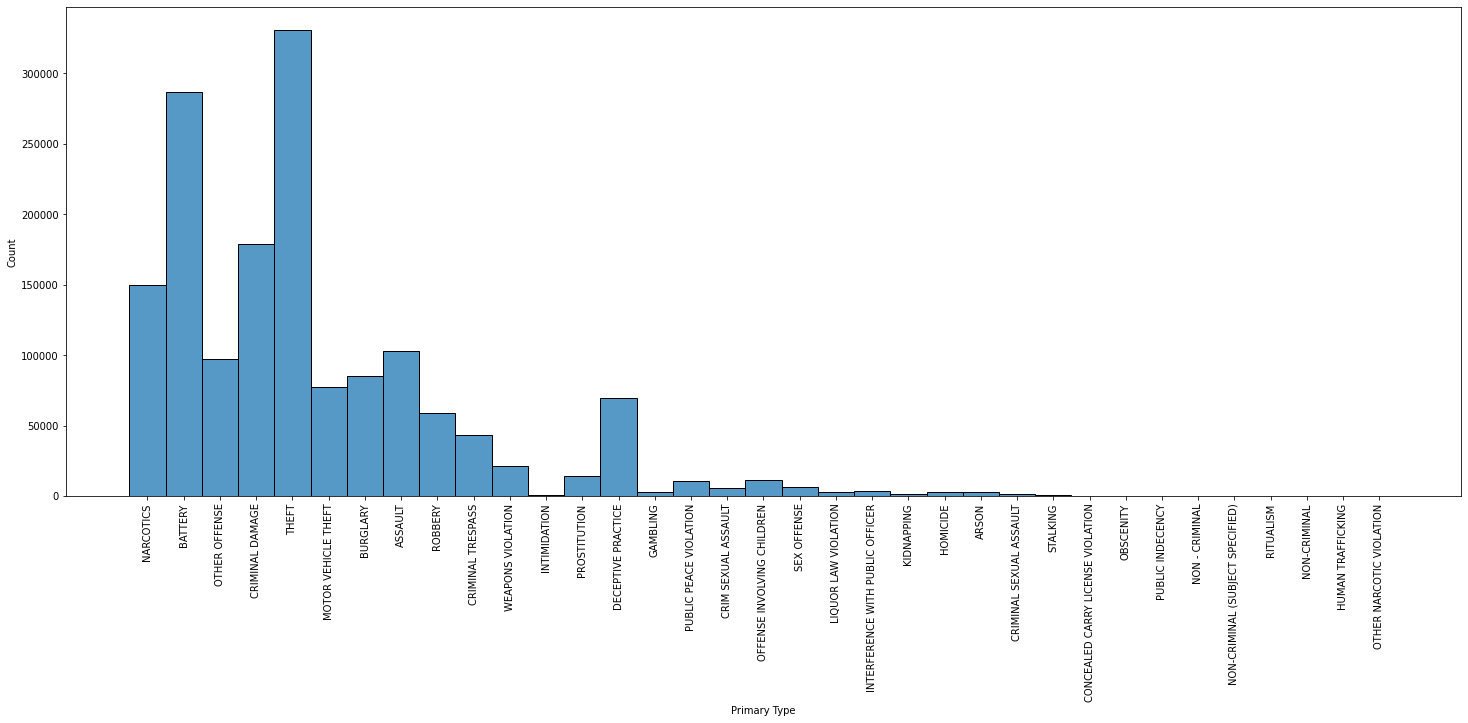

In [205]:
#Histogramas
fig, ax = plt.subplots(figsize=(25,9))
plt.xticks(rotation='vertical')
sns.histplot(df, x="Primary Type")
#piechart Graphline

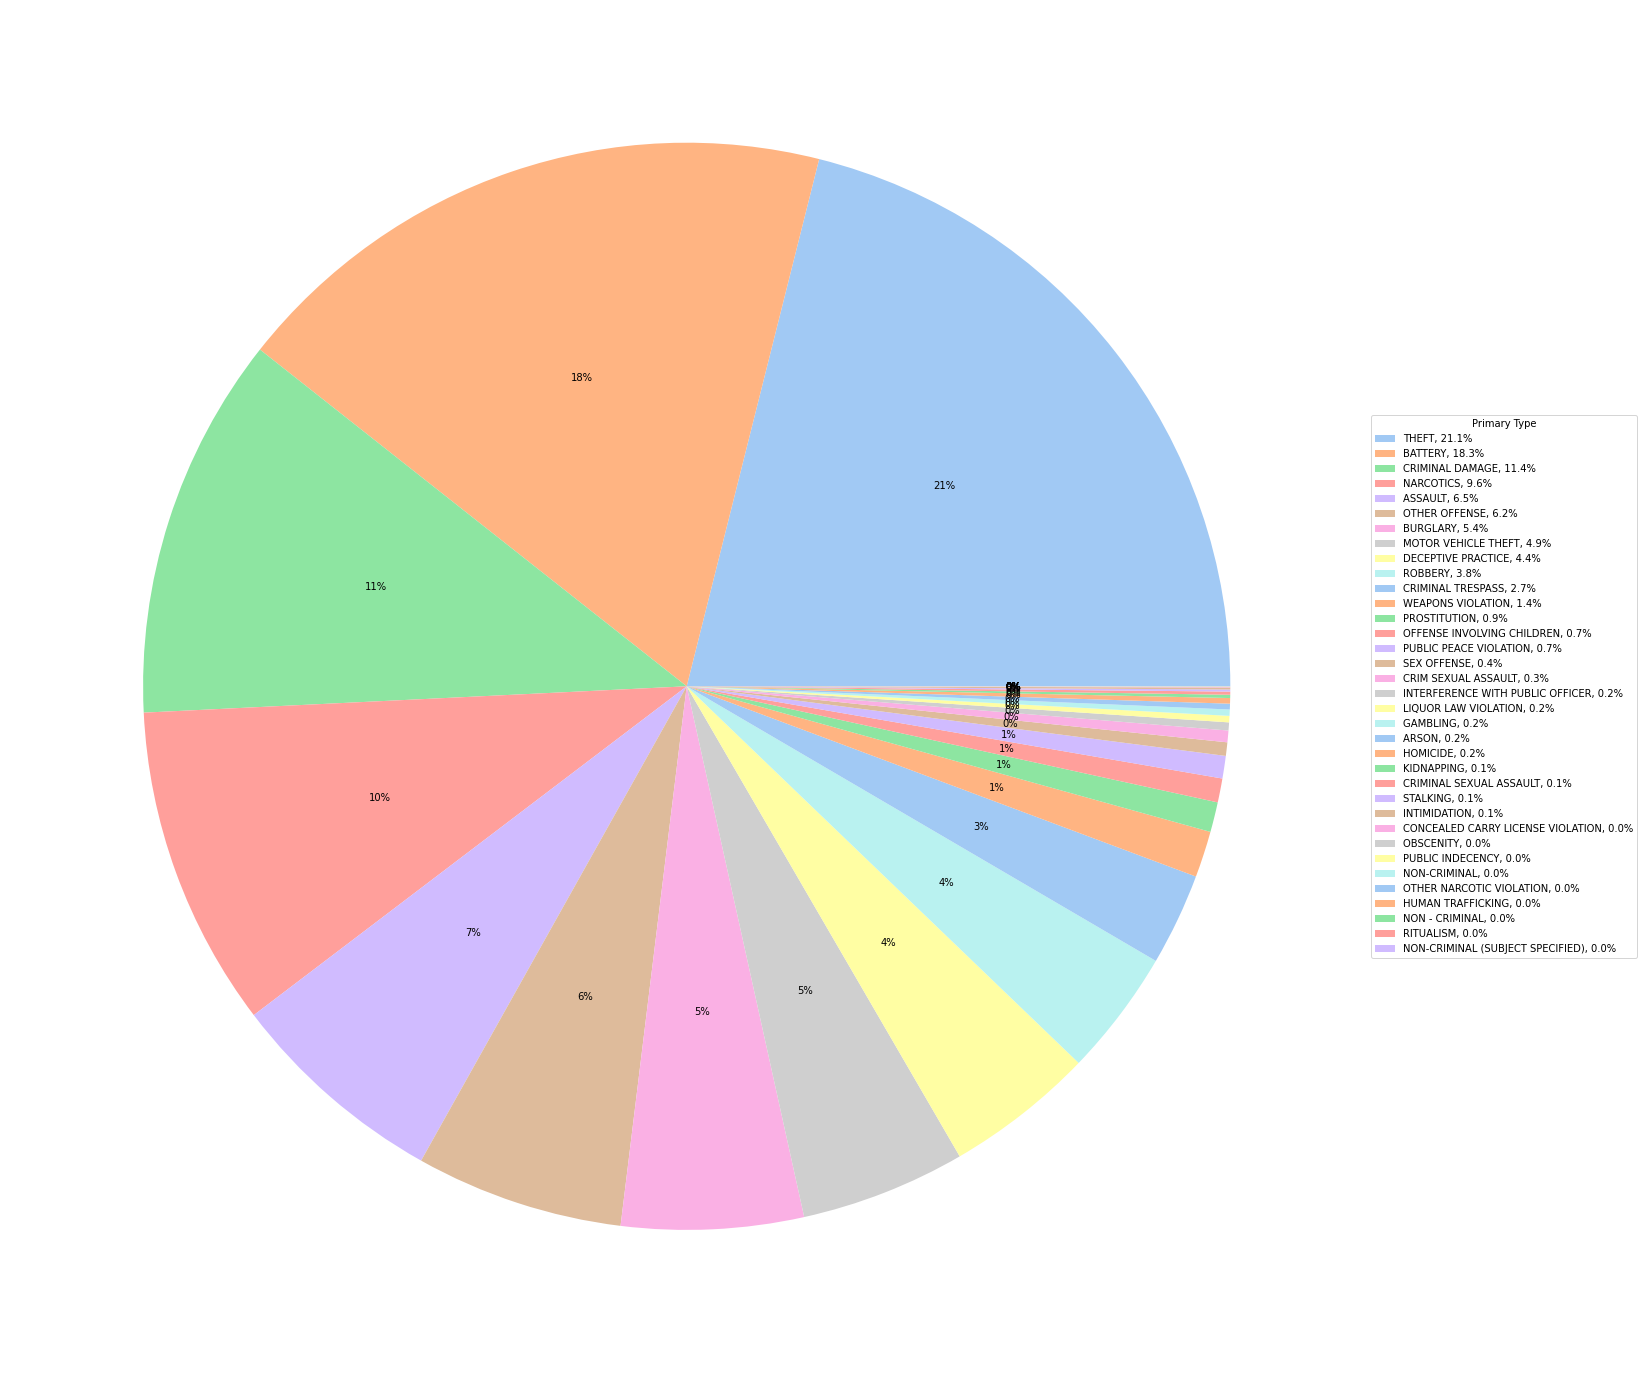

In [206]:
colors = sns.color_palette('pastel')[0:35]
plt.figure(figsize=(25, 25))
s = df["Primary Type"].value_counts()
leg = [f'{l}, {(a/s.sum())*100:0.1f}%' for l, a in zip(s.index, s)]
plt.pie(s, colors = colors, autopct='%.0f%%')
plt.legend(leg,
          title="Primary Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

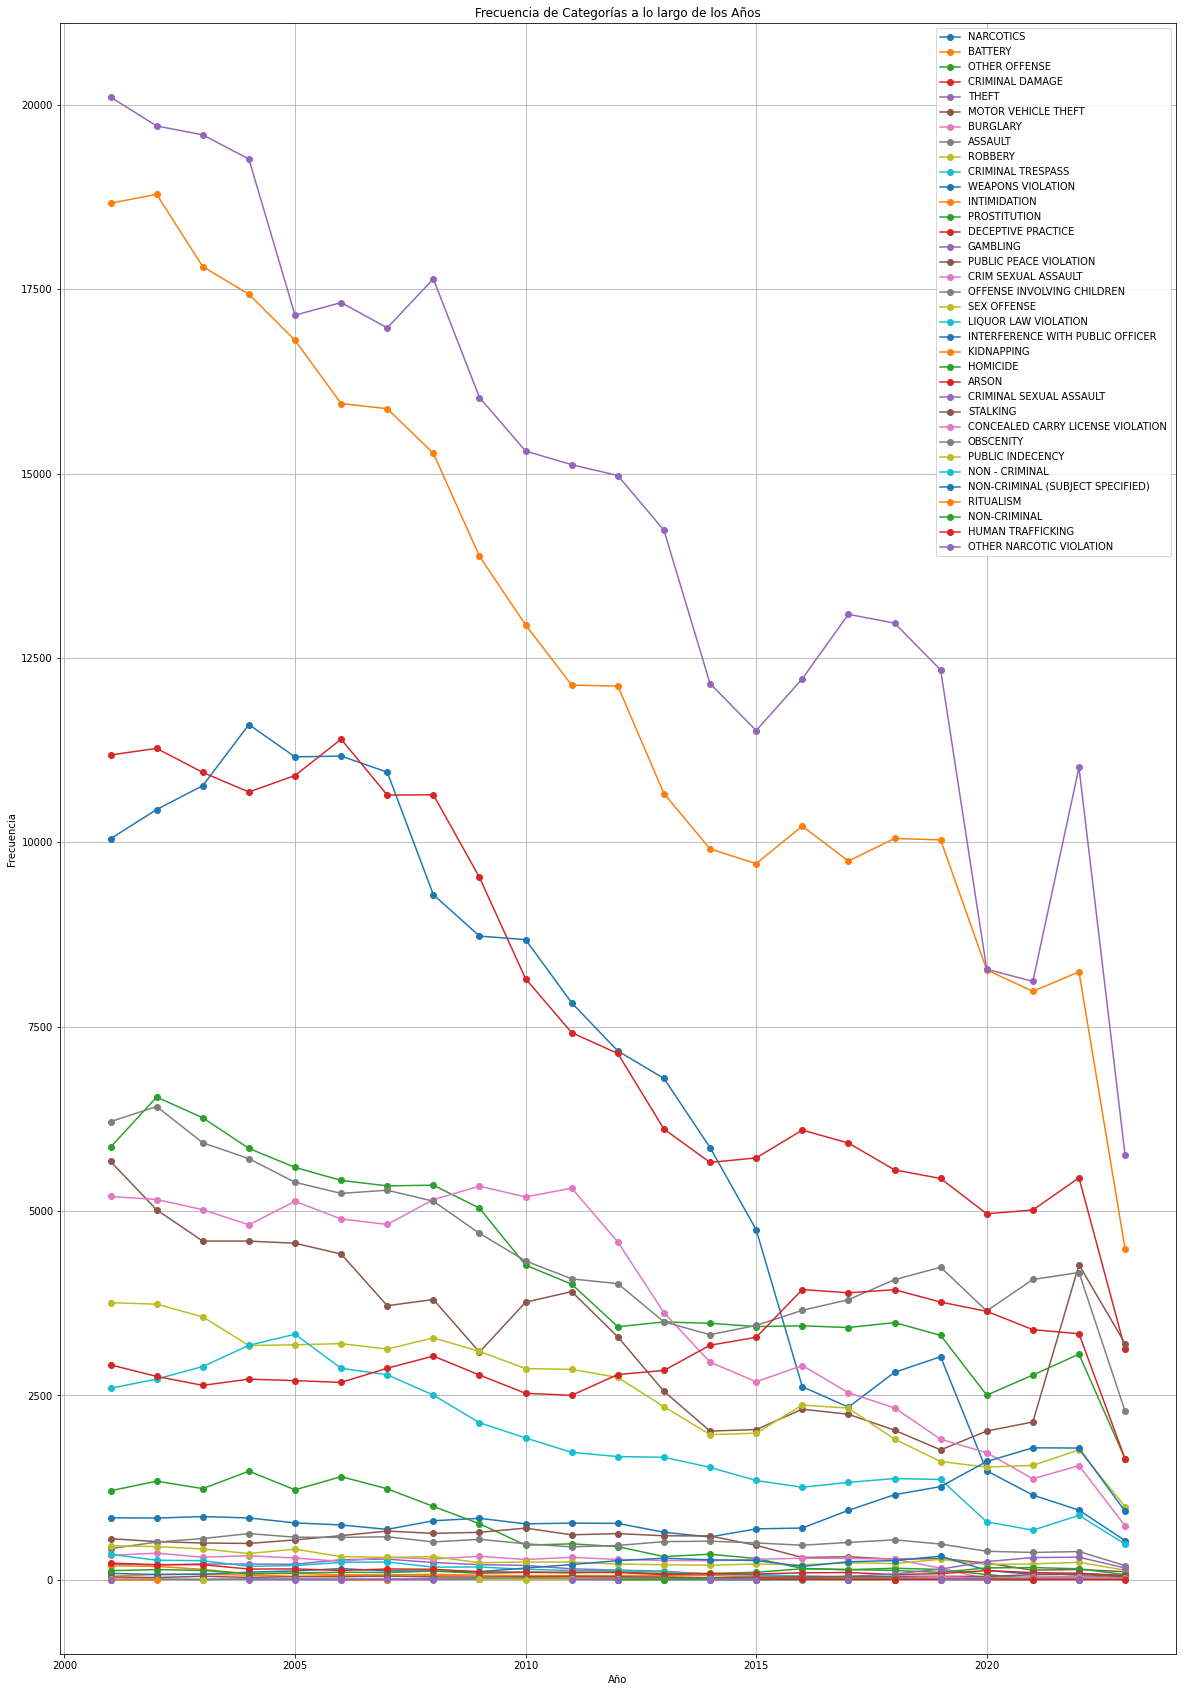

In [207]:
categorias = df["Primary Type"].unique()
# Crear un DataFrame para almacenar las frecuencias de cada categoría
frecuencias_por_categoria = pd.DataFrame()
for categoria in categorias:
    categoria_contador = df[df['Primary Type'] == categoria].groupby('Year').size()
    frecuencias_por_categoria[categoria] = categoria_contador
# Crear el gráfico de líneas
plt.figure(figsize=(20, 30))  # Tamaño de la figura (opcional)
for categoria in categorias:
    plt.plot(frecuencias_por_categoria.index, frecuencias_por_categoria[categoria], label=categoria, marker='o')
# Personalizar el gráfico
plt.title('Frecuencia de Categorías a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(True)  # Mostrar una cuadrícula en el gráfico (opcional)
plt.legend()  # Mostrar la leyenda (etiquetas) en el gráfico
# Mostrar el gráfico
plt.show()
#sns.lineplot(data=df, x="Year", y="Primary Type")

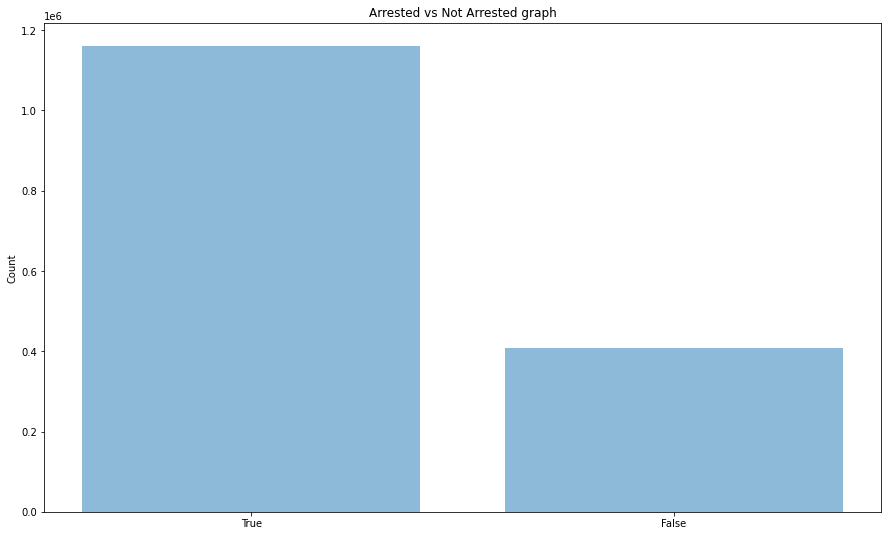

In [208]:
objects = df["Arrest"].unique()
y_pos = np.arange(len(objects))
performance = df["Arrest"].value_counts()
fig, ax = plt.subplots(figsize=(15,9))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Arrested vs Not Arrested graph')

plt.show()

In [209]:
pd.get_dummies(df["Arrest"])

,False,True
6424271,0,1
4202290,0,1
2744439,1,0
5806691,1,0
418576,1,0
...,...,...
7526338,0,1
5282216,1,0
2159932,0,1
2098452,1,0


<AxesSubplot:xlabel='1', ylabel='Count'>

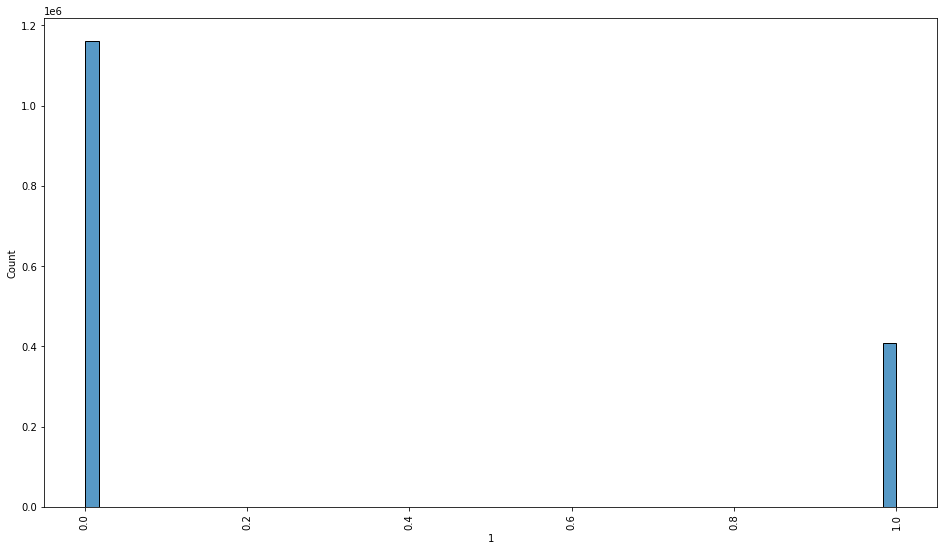

In [210]:
fig, ax = plt.subplots(figsize=(16,9))
plt.xticks(rotation='vertical')
sns.histplot(pd.get_dummies(df["Arrest"]), x=1)
#Cambiar a barras contando true false

In [211]:
df.head()
#Latitud y longitud se puede eliminar y reemplazar por district and Location Description
#Date and block 
#Leer la descripción del problema


,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year
6424271,08/27/2010 08:46:00 PM,062XX S VERNON AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),ALLEY,True,False,3,2010
4202290,05/02/2005 07:45:00 AM,047XX S STATE ST,0460,BATTERY,SIMPLE,CTA BUS,True,False,2,2005
2744439,03/10/2002 11:15:00 AM,065XX S HAMILTON AV,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,7,2002
5806691,01/07/2009 12:40:00 PM,017XX N CAMPBELL AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,14,2009
418576,08/08/2015 11:00:00 AM,068XX S JUSTINE ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,7,2015


In [212]:
df.groupby("District")

In [213]:
dummies = pd.get_dummies(df['Primary Type'])
dummies

,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
6424271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4202290,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2744439,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5806691,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
418576,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526338,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5282216,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2159932,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2098452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [214]:
df['Date'] = pd.to_datetime(df['Date'])  # Convierte la columna a tipo de datos datetime
df['Date'] = df['Date'].dt.date
df

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year
6424271,2010-08-27,062XX S VERNON AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),ALLEY,True,False,3,2010
4202290,2005-05-02,047XX S STATE ST,0460,BATTERY,SIMPLE,CTA BUS,True,False,2,2005
2744439,2002-03-10,065XX S HAMILTON AV,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,7,2002
5806691,2009-01-07,017XX N CAMPBELL AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,14,2009
418576,2015-08-08,068XX S JUSTINE ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,7,2015
...,...,...,...,...,...,...,...,...,...,...
7526338,2013-12-31,051XX W CHICAGO AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,15,2013
5282216,2007-10-04,008XX N WOOD ST,0560,ASSAULT,SIMPLE,SIDEWALK,False,False,12,2007
2159932,2022-11-04,001XX N JEFFERSON ST,1330,CRIMINAL TRESPASS,TO LAND,HOTEL / MOTEL,True,False,1,2022
2098452,2022-08-11,071XX S CHICAGO SKYWAY OB,0810,THEFT,OVER $500,HIGHWAY / EXPRESSWAY,False,False,3,2022


In [215]:
df["IUCR"].unique()
df['IUCR'] = df['IUCR'].str[:2]

In [216]:
df = df.drop(["Block","Description","Location Description"],axis = 1)
df


,Date,IUCR,Primary Type,Arrest,Domestic,District,Year
6424271,2010-08-27,20,NARCOTICS,True,False,3,2010
4202290,2005-05-02,04,BATTERY,True,False,2,2005
2744439,2002-03-10,28,OTHER OFFENSE,False,True,7,2002
5806691,2009-01-07,13,CRIMINAL DAMAGE,False,False,14,2009
418576,2015-08-08,13,CRIMINAL DAMAGE,False,False,7,2015
...,...,...,...,...,...,...,...
7526338,2013-12-31,13,CRIMINAL TRESPASS,True,False,15,2013
5282216,2007-10-04,05,ASSAULT,False,False,12,2007
2159932,2022-11-04,13,CRIMINAL TRESPASS,True,False,1,2022
2098452,2022-08-11,08,THEFT,False,False,3,2022


In [217]:
df['Date'] = pd.to_datetime(df['Date'])
df["Mes"] = df['Date'].dt.strftime('%B')
df

,Date,IUCR,Primary Type,Arrest,Domestic,District,Year,Mes
6424271,2010-08-27,20,NARCOTICS,True,False,3,2010,August
4202290,2005-05-02,04,BATTERY,True,False,2,2005,May
2744439,2002-03-10,28,OTHER OFFENSE,False,True,7,2002,March
5806691,2009-01-07,13,CRIMINAL DAMAGE,False,False,14,2009,January
418576,2015-08-08,13,CRIMINAL DAMAGE,False,False,7,2015,August
...,...,...,...,...,...,...,...,...
7526338,2013-12-31,13,CRIMINAL TRESPASS,True,False,15,2013,December
5282216,2007-10-04,05,ASSAULT,False,False,12,2007,October
2159932,2022-11-04,13,CRIMINAL TRESPASS,True,False,1,2022,November
2098452,2022-08-11,08,THEFT,False,False,3,2022,August


In [218]:
df = df.drop(["Date"],axis = 1)

In [219]:
df

,IUCR,Primary Type,Arrest,Domestic,District,Year,Mes
6424271,20,NARCOTICS,True,False,3,2010,August
4202290,04,BATTERY,True,False,2,2005,May
2744439,28,OTHER OFFENSE,False,True,7,2002,March
5806691,13,CRIMINAL DAMAGE,False,False,14,2009,January
418576,13,CRIMINAL DAMAGE,False,False,7,2015,August
...,...,...,...,...,...,...,...
7526338,13,CRIMINAL TRESPASS,True,False,15,2013,December
5282216,05,ASSAULT,False,False,12,2007,October
2159932,13,CRIMINAL TRESPASS,True,False,1,2022,November
2098452,08,THEFT,False,False,3,2022,August


In [220]:
df['District'] = df['District'].astype(str)
df = df.drop(["Year"],axis = 1)
df['Arrest'] = df['Arrest'].astype(int)
df['Domestic'] = df['Domestic'].astype(int)

In [221]:
columnas_categoricas = df.select_dtypes(include=['object']).columns

for columna in columnas_categoricas:
    dummies = pd.get_dummies(df[columna], prefix=columna)
    df = pd.concat([df, dummies], axis=1)

df = df.drop(columns=columnas_categoricas)

df

,Arrest,Domestic,IUCR_01,IUCR_02,IUCR_03,IUCR_04,IUCR_05,IUCR_06,IUCR_08,IUCR_09,...,Mes_December,Mes_February,Mes_January,Mes_July,Mes_June,Mes_March,Mes_May,Mes_November,Mes_October,Mes_September
6424271,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4202290,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2744439,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5806691,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
418576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526338,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5282216,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2159932,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2098452,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


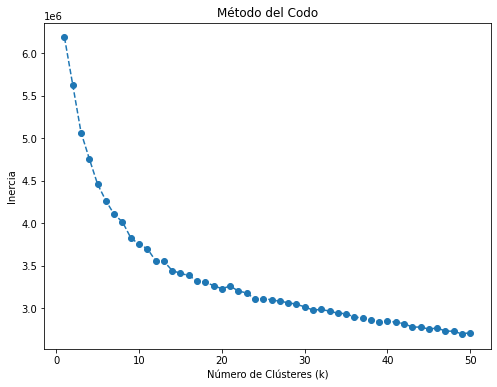

In [222]:
inercia = []
for k in range(1, 51):  
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    inercia.append(kmeans.inertia_)

# Grafica la curva del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 51), inercia, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [223]:
# Realiza el clustering con el número óptimo de clústeres
k_optimo = 15
kmeans = KMeans(n_clusters=k_optimo, random_state=0)
clusters = kmeans.fit_predict(df)

# Agrega la columna de clústeres al DataFrame original
df['Cluster'] = clusters
df

,Arrest,Domestic,IUCR_01,IUCR_02,IUCR_03,IUCR_04,IUCR_05,IUCR_06,IUCR_08,IUCR_09,...,Mes_February,Mes_January,Mes_July,Mes_June,Mes_March,Mes_May,Mes_November,Mes_October,Mes_September,Cluster
6424271,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4202290,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
2744439,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,10
5806691,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3
418576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526338,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
5282216,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,4
2159932,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,12
2098452,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [224]:
# Crea un diccionario para almacenar los features que diferencian un cluster de los otros
differentiating_features = {}

# Lista para llevar un registro de las característic    as seleccionadas
selected_features = []

# Itera a través de los clusters
for cluster in range(15):
    # Filtra el DataFrame para el cluster actual
    cluster_data = df[df['Cluster'] == cluster]
    
    # Divide el DataFrame en características (X) y etiquetas de cluster (y)
    X = cluster_data.drop('Cluster', axis=1)
    y = cluster_data['Cluster']
    
    # Entrena un clasificador Random Forest dentro del cluster actual
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X, y)
    
    # Obtiene la importancia de las características
    importances = clf.feature_importances_
    
    # Ordena las características por importancia en orden descendente
    sorted_indices = importances.argsort()[::-1]
    
    # Inicializa una lista para almacenar las características seleccionadas para este cluster
    cluster_selected_features = []
    
    # Itera a través de las características ordenadas
    for feature_index in sorted_indices:
        feature_name = X.columns[feature_index]
        # Verifica si la característica ya ha sido seleccionada para otro cluster
        if feature_name not in selected_features:
            cluster_selected_features.append(feature_name)
            selected_features.append(feature_name)
        # Si ya se han seleccionado 3 características, detén la búsqueda
        if len(cluster_selected_features) == 4:
            break
    
    # Almacena las características seleccionadas para este cluster en el diccionario
    differentiating_features[cluster] = cluster_selected_features

# Imprime los 3 features que diferencian cada cluster de los otros
for cluster, features in differentiating_features.items():
    print(f'Cluster {cluster}: {features}')

Cluster 0: ['Mes_September', 'IUCR_33', 'IUCR_36', 'IUCR_37']
Cluster 1: ['IUCR_38', 'IUCR_39', 'IUCR_42', 'IUCR_43']
Cluster 2: ['IUCR_45', 'IUCR_46', 'IUCR_47', 'IUCR_48']
Cluster 3: ['IUCR_50', 'IUCR_51', 'Primary Type_ARSON', 'Primary Type_ASSAULT']
Cluster 4: ['Primary Type_BATTERY', 'Primary Type_BURGLARY', 'Primary Type_CONCEALED CARRY LICENSE VIOLATION', 'Primary Type_CRIM SEXUAL ASSAULT']
Cluster 5: ['Primary Type_CRIMINAL DAMAGE', 'Primary Type_CRIMINAL SEXUAL ASSAULT', 'Primary Type_CRIMINAL TRESPASS', 'Primary Type_DECEPTIVE PRACTICE']
Cluster 6: ['Primary Type_GAMBLING', 'Primary Type_HOMICIDE', 'Primary Type_HUMAN TRAFFICKING', 'IUCR_34']
Cluster 7: ['IUCR_32', 'Mes_October', 'IUCR_31', 'Domestic']
Cluster 8: ['IUCR_01', 'IUCR_02', 'IUCR_03', 'IUCR_04']
Cluster 9: ['IUCR_05', 'IUCR_06', 'IUCR_08', 'IUCR_09']
Cluster 10: ['IUCR_10', 'IUCR_11', 'IUCR_12', 'IUCR_13']
Cluster 11: ['IUCR_14', 'IUCR_15', 'IUCR_16', 'IUCR_17']
Cluster 12: ['IUCR_18', 'IUCR_19', 'IUCR_20', 'IUCR_

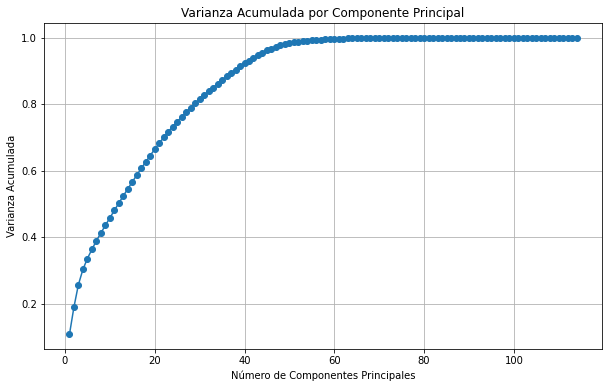

In [243]:
df = df.drop(columns=['Cluster'])
df

# Realiza PCA
pca = PCA()
pca.fit(df)

# Calcula la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Calcula la varianza acumulada
cumulative_variance = np.cumsum(explained_variance)


# Grafica la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada por Componente Principal')
plt.grid()

# Muestra los gráficos
plt.show()

In [244]:
cumulative_variance

array([0.10681535, 0.18917878, 0.25704369, 0.30259132, 0.33560508,
       0.36278882, 0.38890606, 0.41237013, 0.43526563, 0.45804269,
       0.48032023, 0.50250015, 0.52419694, 0.54547704, 0.56644986,
       0.58679768, 0.60681229, 0.62662641, 0.64593907, 0.66485636,
       0.68280863, 0.70053077, 0.71731659, 0.73296869, 0.74767002,
       0.76215707, 0.77652802, 0.79009975, 0.80276965, 0.81523122,
       0.82744152, 0.83909973, 0.85067633, 0.8620296 , 0.87304165,
       0.88397789, 0.89459566, 0.90466952, 0.91447296, 0.9231736 ,
       0.93180917, 0.94020817, 0.94798934, 0.95540704, 0.96233078,
       0.96781407, 0.97328024, 0.97788459, 0.98160101, 0.98432521,
       0.98650976, 0.98852385, 0.9902828 , 0.99161324, 0.99284106,
       0.99388898, 0.99484723, 0.99573373, 0.99658112, 0.99721577,
       0.99770727, 0.99809027, 0.9984203 , 0.99873142, 0.99899629,
       0.99923314, 0.99939926, 0.9995282 , 0.9996241 , 0.99970246,
       0.99975421, 0.99980329, 0.99984654, 0.99988816, 0.99990

In [247]:
model = pca(n_components=60)

# Aplica PCA a los datos
principal_components = model.fit_transform(df)


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [114] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[60]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Hex [[0, 0, 0]] should be of type string
[scatterd] >INFO> Create scatterplot


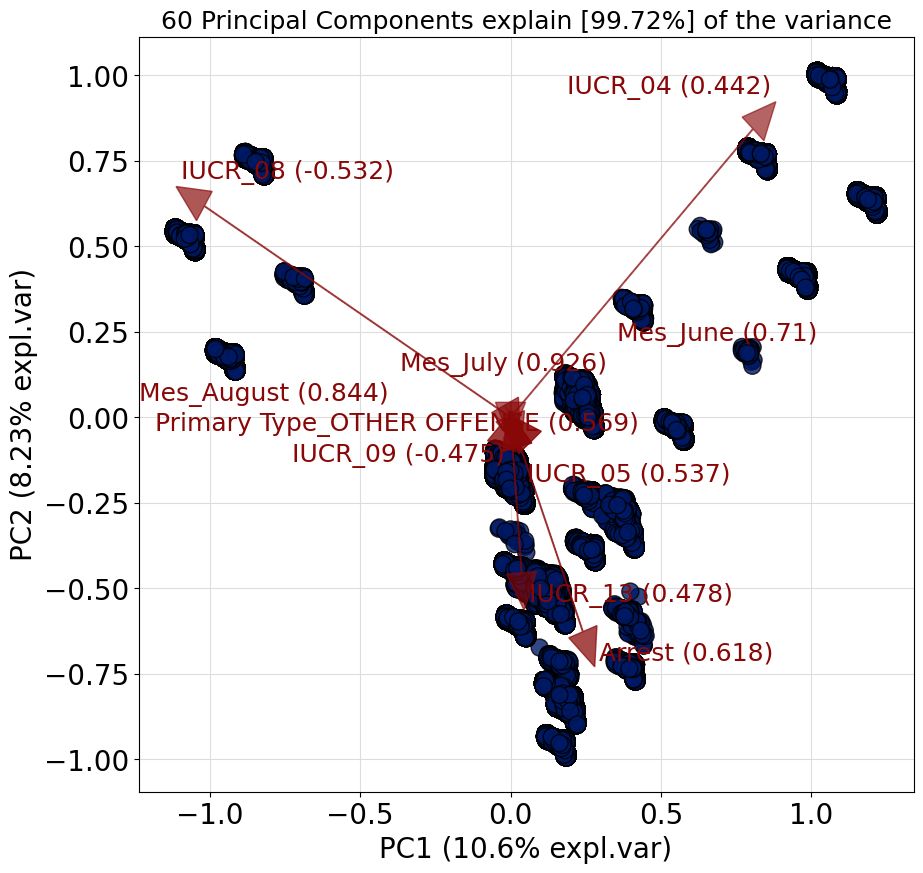

In [249]:
fig, ax = model.biplot(n_feat=10, legend=False, figsize=(10,10))